### Name: Anthony Rodrigues
### Roll No.: 58
### PID: 246048
### Date: 02/02/2026
### Subject: ML
### Experiment No.: 04 
## Title: Experiment-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



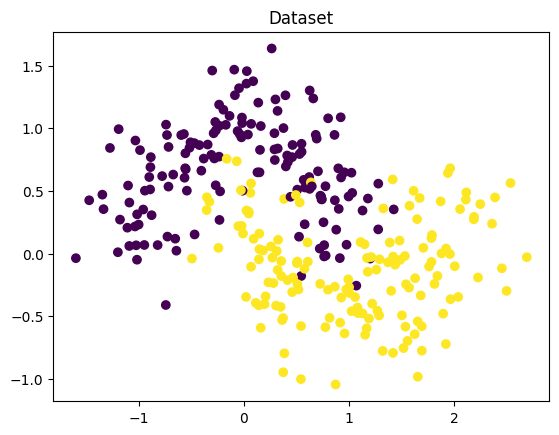

In [28]:
# Step 1: Create Dataset
x,y= make_moons(n_samples = 300 , noise = 0.25 , random_state = 42)

plt.scatter(x[:,0], x[:,1], c=y)
plt.title("Dataset")
plt.show()

In [29]:
# Step 2: Train-test Split

x_train, x_test, y_train , y_test = train_test_split(
    x,y,test_size=0.3,random_state=0
)



In [30]:
# Step 3: Scaling (important for trainning LR and KNN)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
# Step 4 : Models

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train_scaled, y_train)

y_pred_lr = lr.predict(x_test_scaled)

print("LogisticRegression")
print("Accuracy:",accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

LogisticRegression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


In [32]:
# Step 5 : Decision tree

dt = DecisionTreeClassifier(max_depth=4)

dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

print("Decision Tree")
print("Accuracy:",accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [39]:
# Step 6 : KNN

knn = KNeighborsClassifier(n_neighbors= 5)

knn.fit(x_train_scaled,y_train)

y_pred_knn = knn.predict(x_test_scaled)

print("KNN")
print("Accuracy:",accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


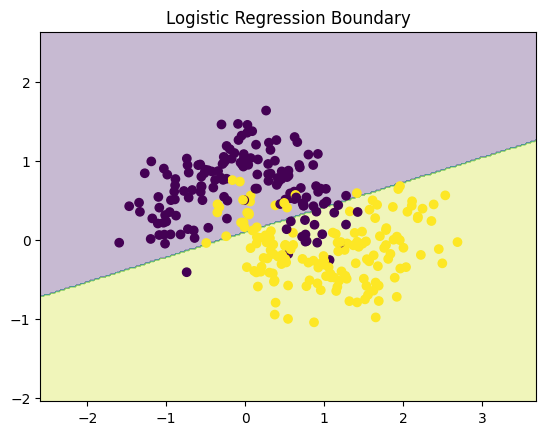

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boundary(model, scaled, title):
    h = 0.02

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaled:
        grid = scaler.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.title(title)
    plt.show()


# function call (outside the function)
plot_boundary(lr, True, "Logistic Regression Boundary")


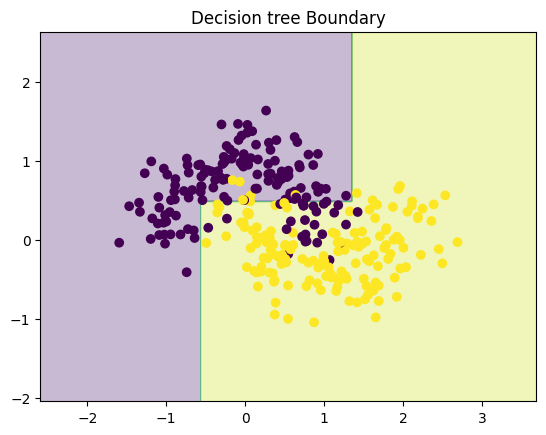

In [41]:
plot_boundary(dt, False, "Decision tree Boundary")

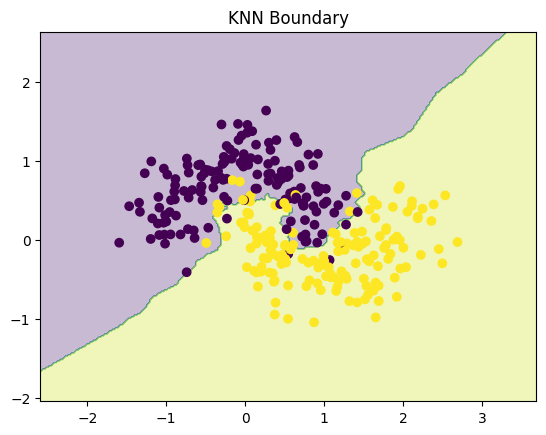

In [43]:
plot_boundary(knn,True, "KNN Boundary")